In [1]:
import traj_dist.distance as tdist #to compile distances
import pyclustering as cl #to cluster the distances
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
import traja as tr #to work with trajectory data
import pandas as pd #to read csv file
import itertools #to compare all trajectories
import numpy as np
from matplotlib import pyplot as plt
import csv
from traja.frame import TrajaCollection #to use all trajectories at once
import seaborn as sns
import geopandas
import geoplot
from shapely.geometry import MultiLineString, LineString, Point, MultiPoint
import math

Read in csv clustered file

In [50]:
keys = pd.read_csv('rnn_cluster_key_nodownsampling_resampled-spring.csv')  
individual = []
key_list = []
for index, row in keys.iterrows():
    for item in row:
        if(math.isnan(item) == False):
            if(item > 10):
                individual.append(item)
    if (individual != []):
        key_list.append(individual)
    individual = []
print(key_list)
trajectories = pd.read_csv('t2vec-master/experiment/combined_exp2_r0-resampled-spring.csv')  
x_lat_list = []
y_long_list = []
x_lat_list = trajectories.latitudes
y_long_list = trajectories.longitudes
print(x_lat_list)

[[16.0], [17.0], [20.0], [32.0], [33.0], [47.0], [53.0], [55.0], [56.0, 11.0], [50.0, 30.0, 28.0, 45.0, 31.0, 43.0, 34.0, 39.0, 48.0, 40.0, 29.0, 38.0, 36.0, 46.0, 21.0, 35.0, 57.0, 15.0, 27.0, 42.0, 59.0, 25.0, 26.0], [12.0, 13.0, 14.0], [41.0, 61.0, 51.0, 19.0, 58.0, 52.0, 22.0, 49.0, 24.0, 44.0], [18.0, 37.0, 54.0, 60.0]]
0     [71.196864, 71.1967484, 71.19699109999998, 71....
1     [73.5002569, 73.48803249999997, 73.4882995, 73...
2     [43.30617279999999, 43.3061671, 43.3061888, 43...
3     [73.15793599999998, 73.1581051, 73.1638952, 73...
4     [72.7049334, 72.673422, 72.7044763, 72.7095005...
                            ...                        
62    [29.12642, 29.16038, 29.11781, 29.11533, 29.11...
63    [29.085009999999997, 29.1232, 29.1232400000000...
64    [29.09862, 29.09869, 29.09874000000001, 29.103...
65    [29.09931, 29.09917, 29.09912000000001, 29.096...
66    [29.11442000000001, 29.11442000000001, 29.1143...
Name: latitudes, Length: 67, dtype: object


Convert csv strings to latitude and longitude numbers

In [51]:
list_of_lists = []
new_list = []
long_float = []
lat_float = []
for r in y_long_list:
    r = r[1:len(r)-1]
    long_float.append([float(v) for v in r.split(',')])
    
for r in x_lat_list:
    r = r[1:len(r)-1]
    lat_float.append([float(v) for v in r.split(',')]) 

Create Asia map

In [52]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
asia = world.cx[90:, 45:]#('continent == "Asia"')
#asia.plot()

Create lists for first and last points of clusters

In [53]:
First_last = []
df_First_last = pd.DataFrame(columns = ['First', 'Last'])
for cluster in range(len(list_of_lists)):
    First_last.append(list_of_lists[cluster][0])
    First_last.append(list_of_lists[cluster][len(list_of_lists[cluster])-1])
    print(First_last)
    df_First_last.loc[len(df_First_last)] = First_last
    First_last = []
print(df_First_last)

Empty DataFrame
Columns: [First, Last]
Index: []


Visualize the clusters of the CSV file onto the world map

test
test
test
test
test
test
test
test
test
test
test
test
test


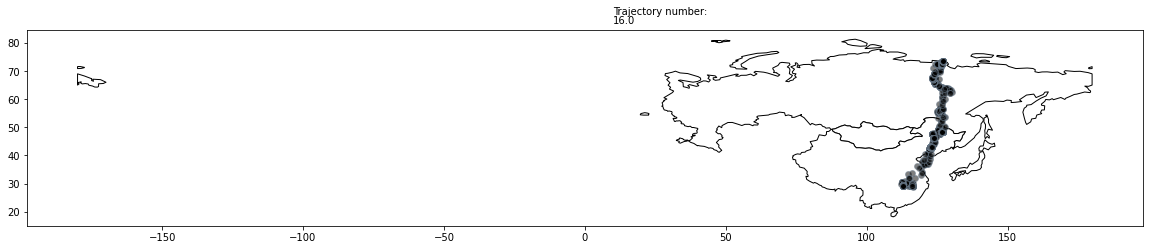

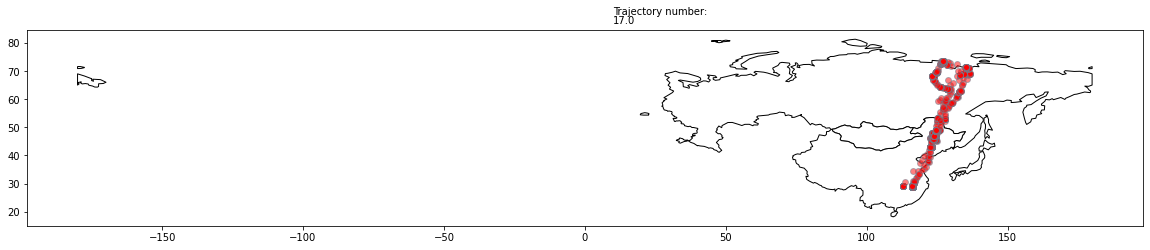

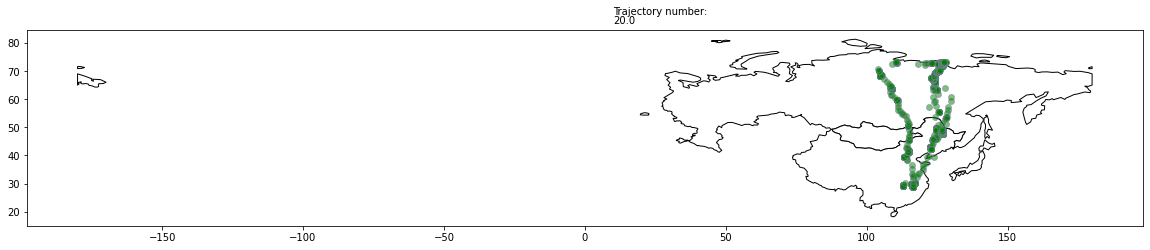

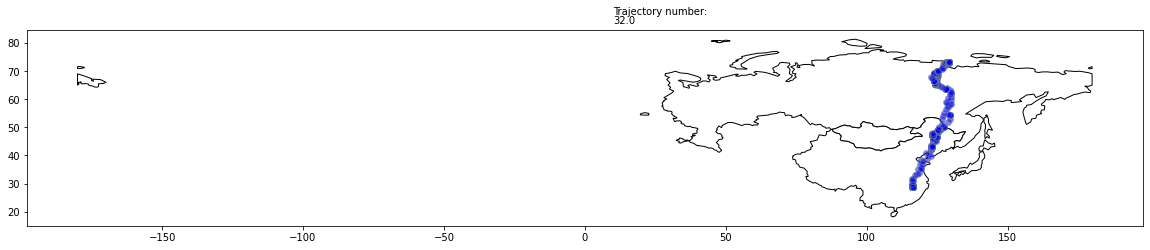

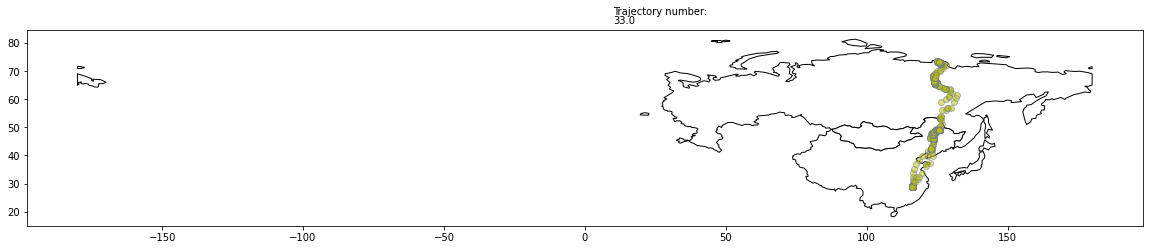

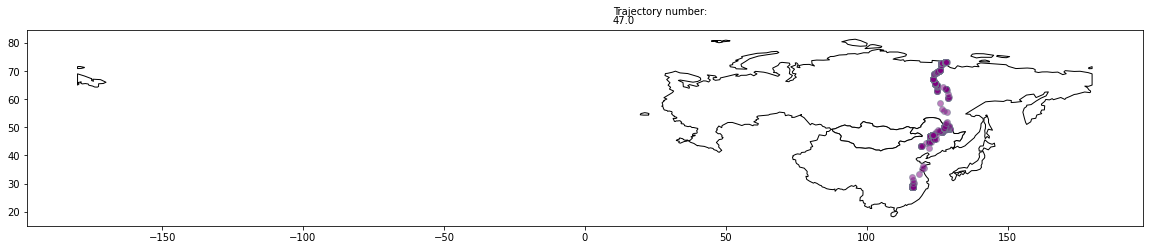

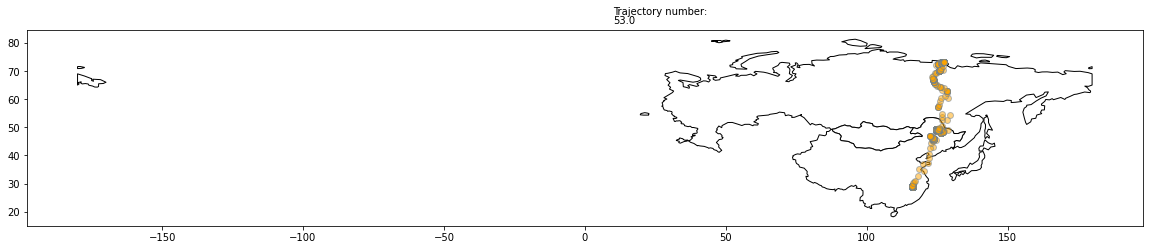

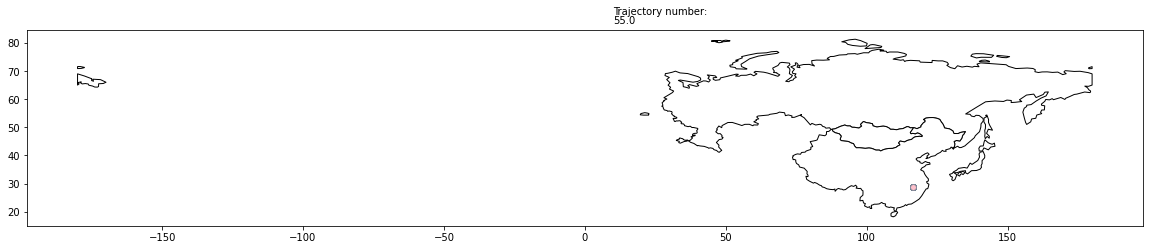

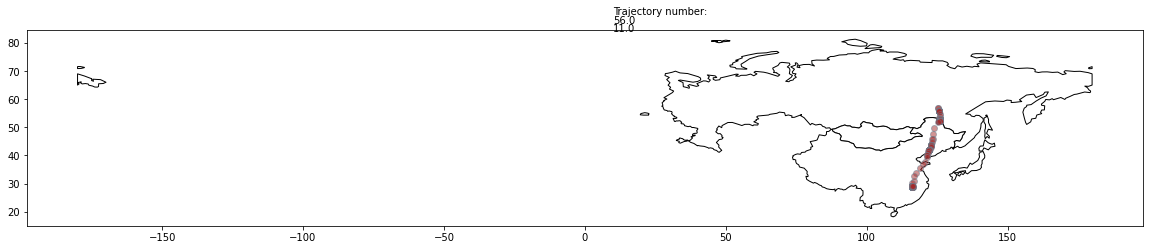

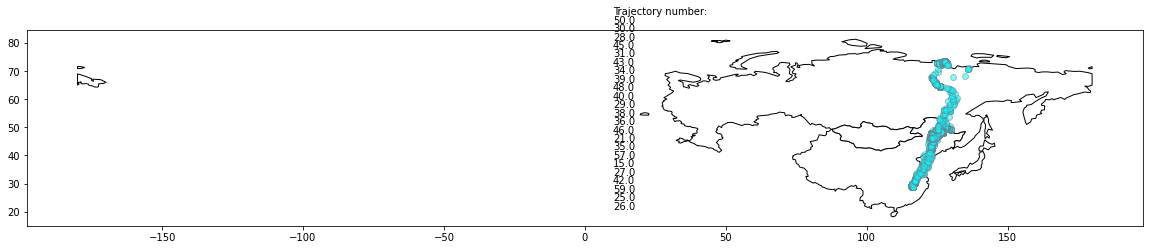

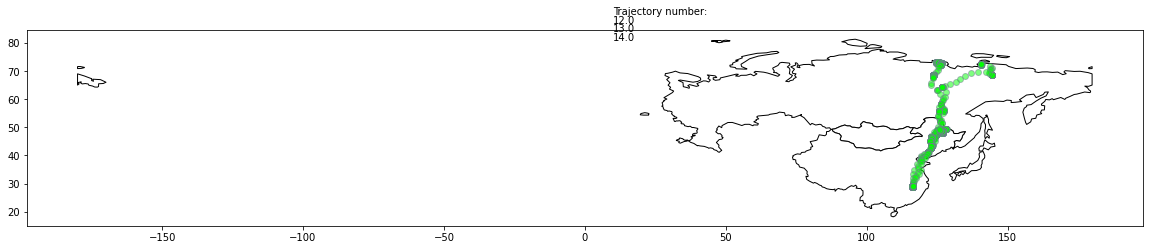

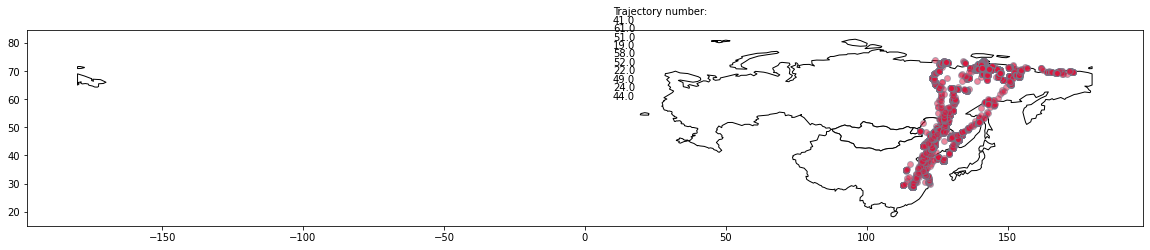

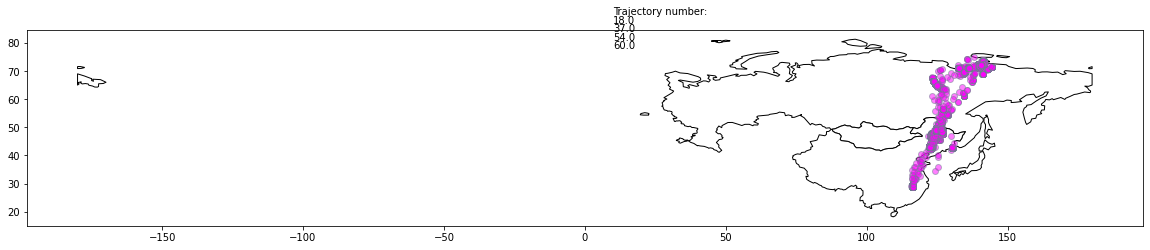

In [54]:
from matplotlib.lines import Line2D
gdf = []
df_all = pd.DataFrame(columns = ['Long', 'Lat'])  
colour = ['k', 'r', 'g', 'b', 'y', 'purple', 'orange', 'pink', 'brown','cyan', 'lime', 'crimson', 'fuchsia', 'darkred', 'goldenrod']
long = []
lat = []
first = []
north = True
i = 0
POLYLINE = []
legend_elements = [Line2D([0], [0], marker='o', color='slategray', label='Northern migration',
                          markerfacecolor='w', markersize=5),
                  Line2D([0], [0], marker='o', color='black', label='Southern migration',
                          markerfacecolor='w', markersize=5)]


for cluster in key_list:
    for key in cluster:
        for index in range(len(long_float[int(key)-1])):
            if(index<len(long_float[int(key)-1])):
                if(long_float[int(key)-1][index] < 100):
                    print(long_float[int(key)-1][index])
                    long_float[int(key)-1].pop(index)
                    lat_float[int(key)-1].pop(index)
                    print(long_float[int(key)-1][index-1])

for cluster in key_list:
    world = geopandas.read_file(
        geopandas.datasets.get_path('naturalearth_lowres')
    )
    asia = world.cx[90:, 45:]#('continent == "Asia"')
    for key in cluster:
        first.append(lat_float[int(key)-1][0])
        polyline= list(zip(long_float[int(key)-1],lat_float[int(key)-1]))
        POLYLINE.append(polyline)
    for index in range(len(POLYLINE)):
        POLYLINE[index] = MultiPoint(points=list(POLYLINE[index]))
    gdf = geopandas.GeoDataFrame(geometry=POLYLINE)
    POLYLINE = []
    first = []
    base = asia.plot(figsize=(20, 15), color='white', edgecolor='black')
    place = 87
    base.text(10, 90, 'Trajectory number: ', fontsize=10)
    for key in cluster:
        base.text(10, place, '{}'.format(key), fontsize=10)
        place = place - 3
    figure_name = "RNN_cluster__spring_north_{}.png".format(i)
    if(north):
        fig = gdf.plot(ax=base, alpha=0.5, edgecolor='slategray', color= colour[i]).get_figure()
    else:
        fig = gdf.plot(ax=base, alpha=0.5, edgecolor='black', color= colour[i]).get_figure()
    fig.savefig(figure_name)
    i = i + 1
    north = True


Create average trajectories from clusters

test
116.31373731481484
116.33710241450777
117.59928000000001
118.35606000000001
119.88533999999999
120.38972
121.2374
121.9084
122.28416000000001
122.61995
123.156492
123.52796888888886
123.77096466666669
123.73945651785719
123.37370176470588
125.64332600000002
125.56822779944278
test
116.32232632352937
116.27259379091872
117.46106999999999
117.64063
119.32212
120.08795
122.70312
123.06463000000001
122.98947
124.19665000000002
124.18945000000001
123.7537511827958
122.86414233333339
125.55076378378376
125.54768951754387
125.91808999999999
test
116.20340547263692
116.30879467144572
116.68718999999999
122.14307
123.2457
124.01952
123.64168599999994
123.65107251748255
124.21282
126.78029201327433
125.81608999999999
test
116.29983842696628
116.14736912784588
test
116.2590446001881
116.2174026664884
118.28778999999999
118.88818
119.7802
120.40108000000001
121.15218
122.01357333333334
122.93884
123.19368
123.46761000000001
123.19356428571429
123.76973000000001
124.25779464285715
130.32602847

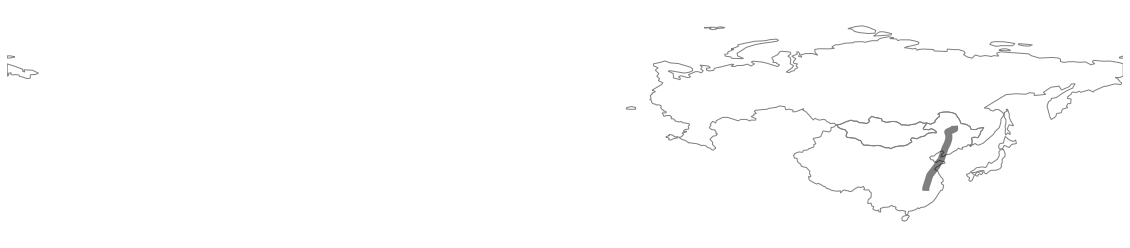

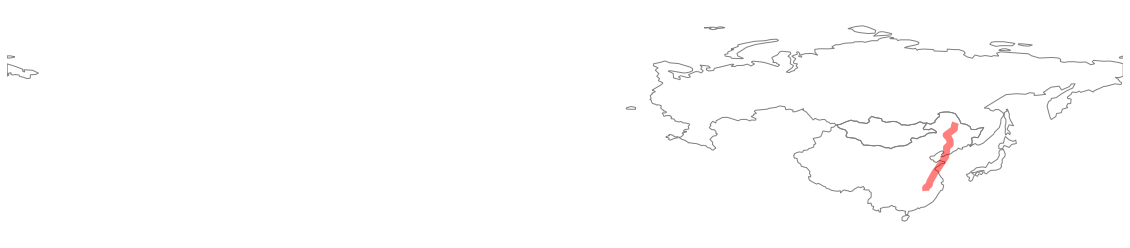

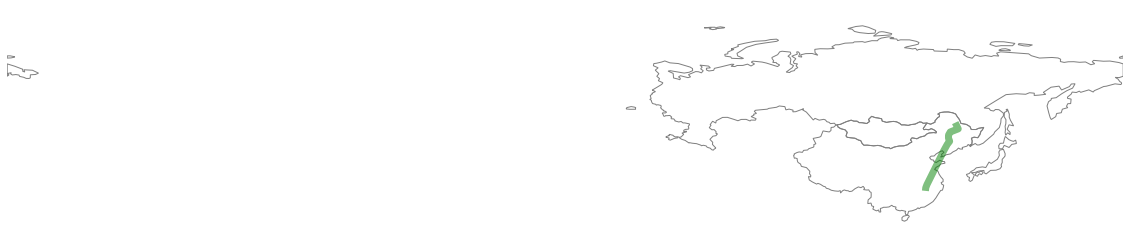

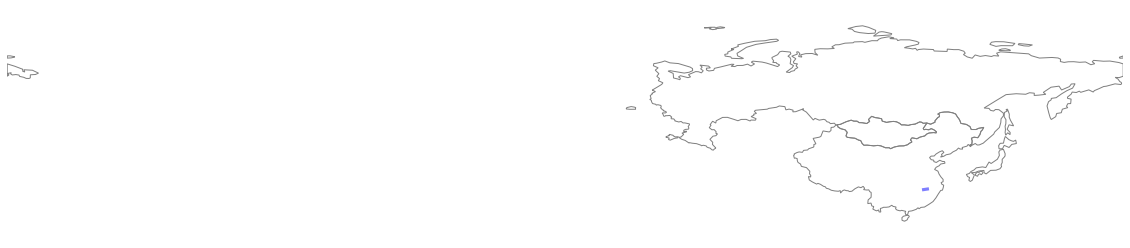

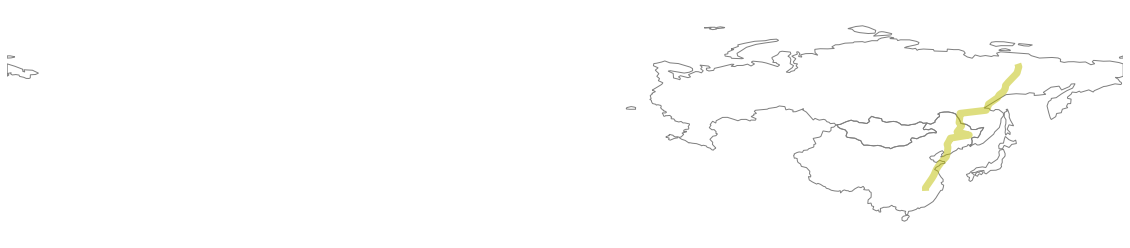

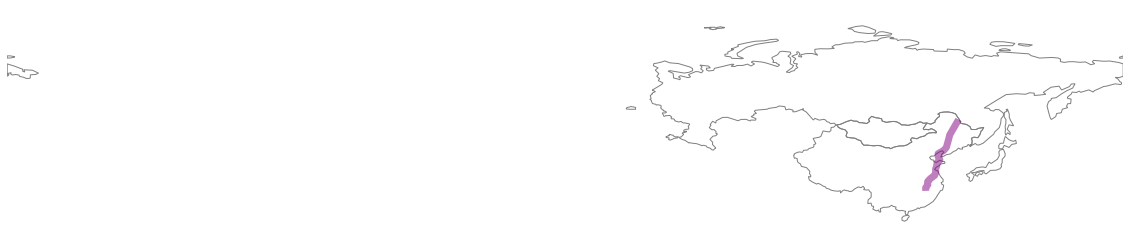

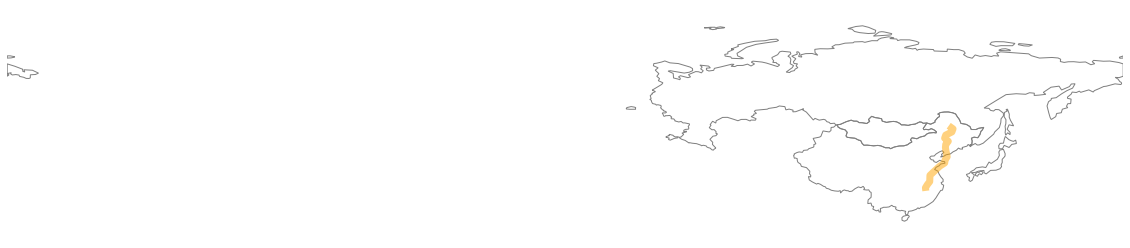

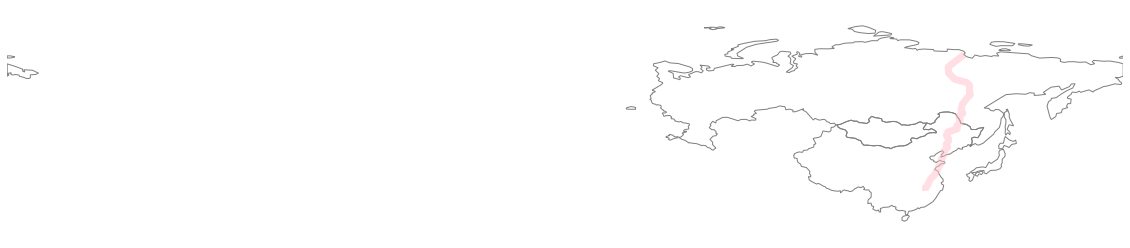

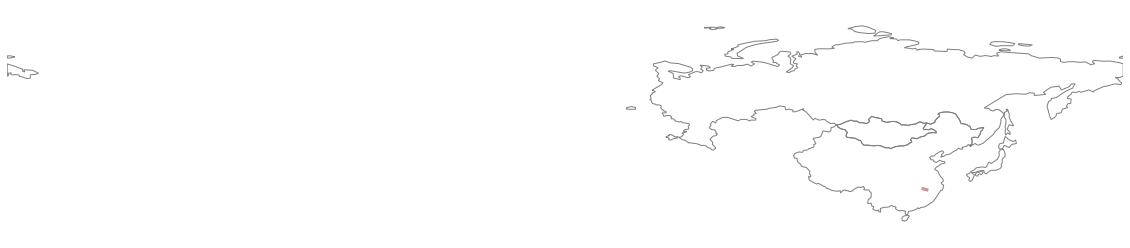

In [50]:
from shapely.geometry import Polygon, LineString
counter = 0
    
import math
for cluster in key_list:
    twod_list = []             
    for i in range (0, 90):                              
        twod_list.append([])  
    
    for key in cluster:
        for long, lat in zip(long_float[int(key)-1],lat_float[int(key)-1]):
            twod_list[int(lat)].append(long)

    for i in range (0, 90):  
        if(len(twod_list[i]) > 0):
            twod_list[i] = sum(twod_list[i])/len(twod_list[i])
        else:
            twod_list[i] = 0
    df_mean = pd.DataFrame(columns=['mean_lat', 'mean_long'])
    for i in range (0, 90):  
        if(twod_list[i] != 0  and twod_list[i] > 100):
            df_mean.loc[len(df_mean)] = [i,twod_list[i]]
    
    
    points = geopandas.GeoSeries(map(Point, zip(df_mean['mean_long'], df_mean['mean_lat'])))
    line = LineString(points.tolist())
    line_gdf = geopandas.GeoDataFrame(geometry=[line])
    ax = line_gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor=colour[counter], color= colour[counter], linewidth=7)
    figure_name = "RNN_cluster_average{}.png".format(colour[counter])
    fig = geoplot.polyplot(asia, edgecolor='gray', ax=ax).get_figure()
    fig.savefig(figure_name)
    counter = counter + 1
